# Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Loading Data

In [ ]:
df = pd.read_csv("/Users/aprakash.21/Desktop/boston_housing_data.csv")
df

NameError: name 'pd' is not defined

# Data Exploration

In [ ]:
df.shape

(505, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [ ]:
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78...
freq,1


ValueError: Could not interpret value `CRIM` for `x`. An entry with this name does not appear in `data`.

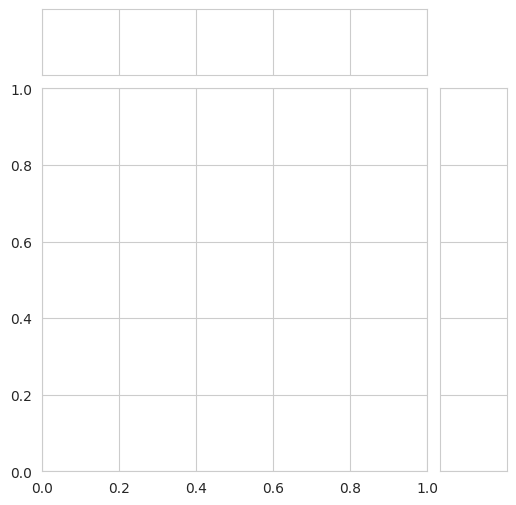

In [ ]:
# Relationship between Crime and MEDV
sns.set_style('whitegrid')
sns.jointplot(x = 'CRIM', y = 'MEDV', data = df)
plt.show()

In [ ]:
sns.jointplot(x = 'NOX', y = 'MEDV', data = df, kind = 'kde', fill = True)
# homes at or above the median home value have the highest nitric oxide concentrations.

In [ ]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

More room means more price.

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot= True)
plt.show()


Some interesting correlations here
- There is highest positive correlation (0.91)  bewteen property tax (TAX) and accessibility to radial highways
- The greatest negative correlation lies between nitirc oxide concentration (NOX) and (DIS)

# Data Preparation

In [ ]:
# Splitting data into input and output
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [ ]:
# Splitting data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Tuning Parameters of Models

### 1) Tuning Decision Tree

In [ ]:
params = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "max_depth": [None, 2, 5, 8],
    "min_samples_split": [2, 4, 7]
}

grid_dtr = GridSearchCV(DecisionTreeRegressor(), params)
grid_dtr.fit(X_train, y_train)
grid_dtr.best_params_

NameError: name 'X_train' is not defined

### 2) Tuning Random Forest

In [ ]:
params = {
    "n_estimators": [50, 100, 200],
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_depth": [None, 2, 5, 8]
}

grid_dtr = GridSearchCV(RandomForestRegressor(), params)
grid_dtr.fit(X_train, y_train)
grid_dtr.best_params_

NameError: name 'X_train' is not defined

# Building Final Tuned Models

In [ ]:
# check the performance on diffrent regressor
models = []
models.append(('Decision Tree', DecisionTreeRegressor(criterion="friedman_mse", splitter='best', max_depth=8, min_samples_split=2)))
models.append(('Random Forest', RandomForestRegressor(criterion="mse", max_depth=None, n_estimators=50)))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()

    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)

    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)

    train_l.append(train)
    test_l.append(test)

    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)



    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

NameError: name 'X_train' is not defined

In [ ]:
comp = pd.DataFrame({"Model": dict(models).keys(), "R2 Score": r2_l, "Training Score": train_l, "Testing Score": test_l, "MAE": mae_l, "RMSE": rmse_l}).sort_values("R2 Score",ascending=False)
comp

From this we can see that Random Forest is performing better than the
Decision Tree.